In [17]:

import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "AmesHousing.csv"

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "prevek18/ames-housing-dataset",
    file_path,
)

print("First 5 records:", df.head())

Using Colab cache for faster access to the 'ames-housing-dataset' dataset.
First 5 records:    Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv

## Limpeza

In [12]:
missing_values = df.isnull().sum()
print("Missing values per column:")
display(missing_values[missing_values > 0])

Missing values per column:


,0
Lot Frontage,490
Alley,2732
Mas Vnr Type,1775
Mas Vnr Area,23
Bsmt Qual,80
Bsmt Cond,80
Bsmt Exposure,83
BsmtFin Type 1,80
BsmtFin SF 1,1
BsmtFin Type 2,81


In [16]:
cols_to_drop = ['Alley', 'Pool QC', 'Fence', 'Misc Feature', 'Mas Vnr Type']
df_cleaned = df.drop(columns=cols_to_drop)

numerical_cols_to_impute = ['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area']
for col in numerical_cols_to_impute:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

categorical_cols_to_impute_none = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
for col in categorical_cols_to_impute_none:
    df_cleaned[col] = df_cleaned[col].fillna('None')

df_cleaned['Electrical'] = df_cleaned['Electrical'].fillna(df_cleaned['Electrical'].mode()[0])

missing_values_after_cleaning = df_cleaned.isnull().sum()
print("\nMissing values per column after cleaning:")
display(missing_values_after_cleaning[missing_values_after_cleaning > 0])


Missing values per column after cleaning:


,0


## Análise exploratoria


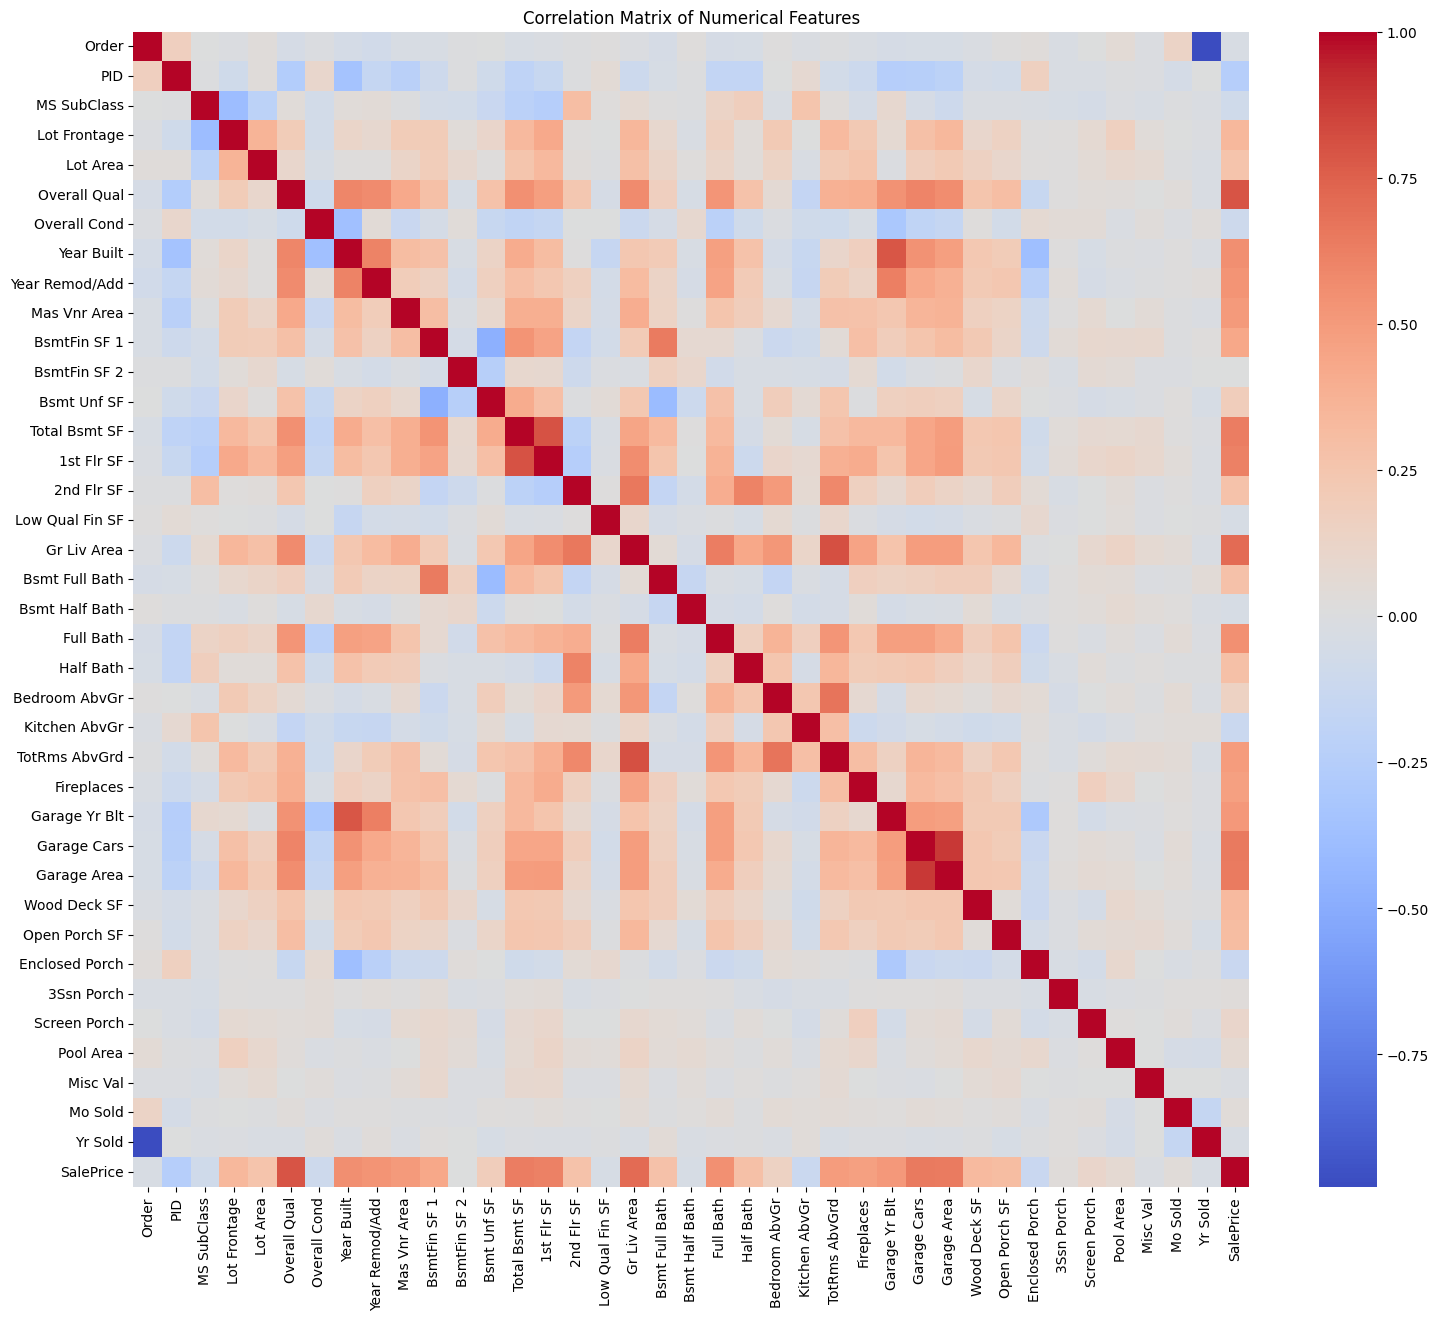

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_df = df_cleaned.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

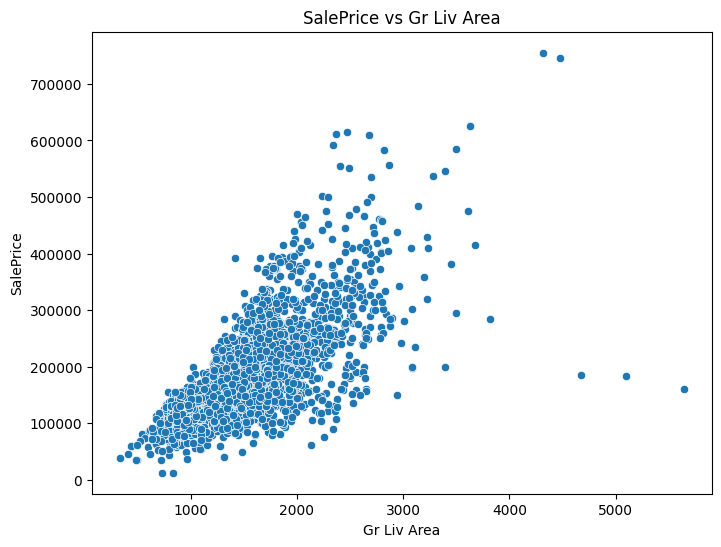

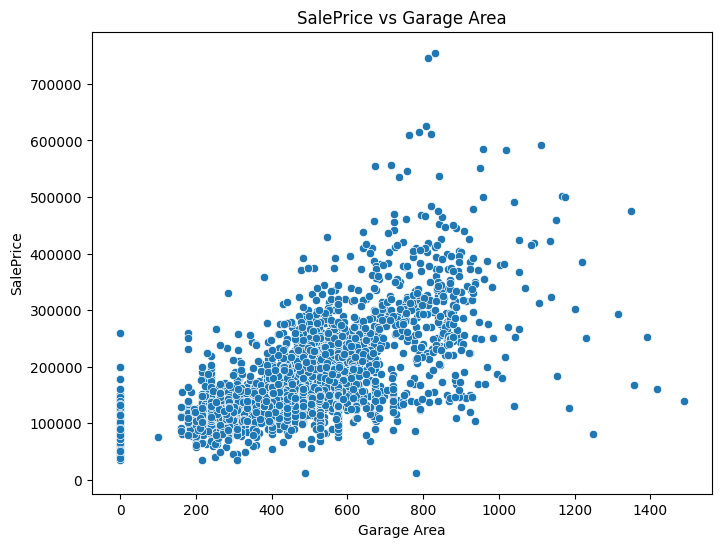

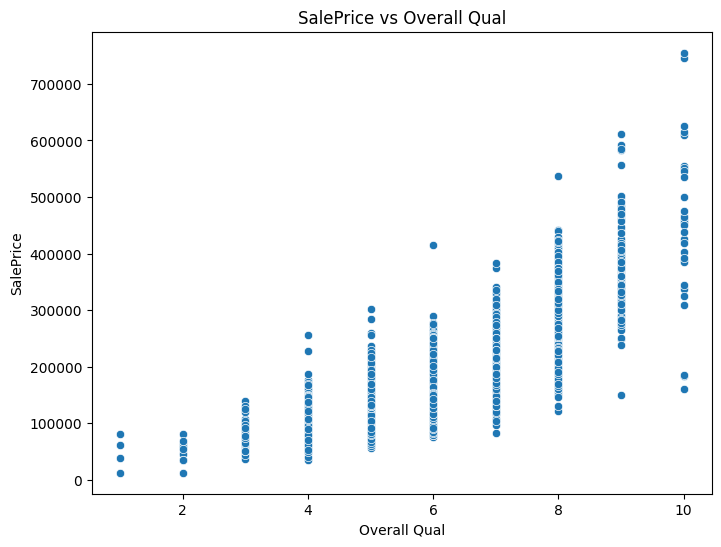

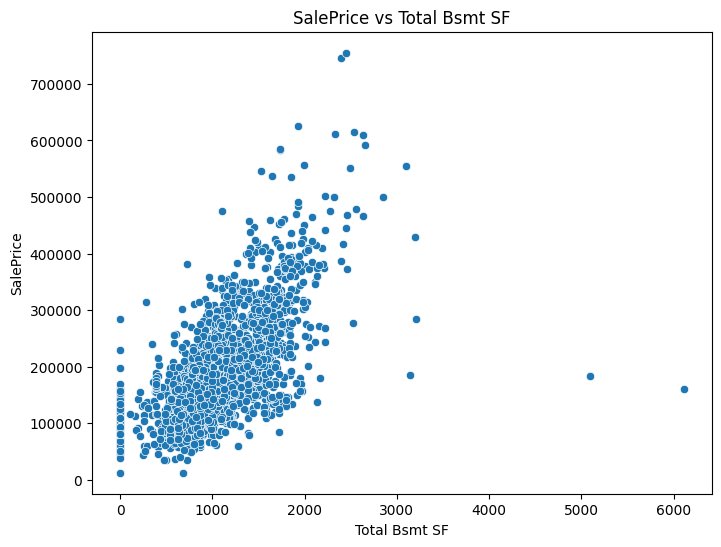

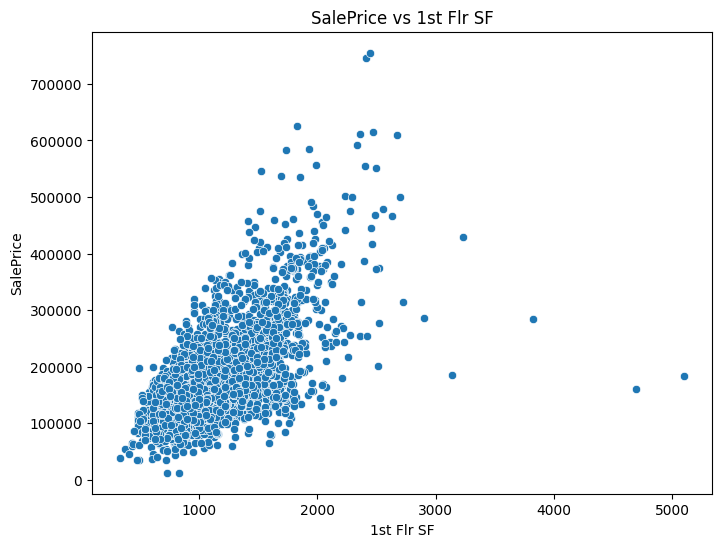

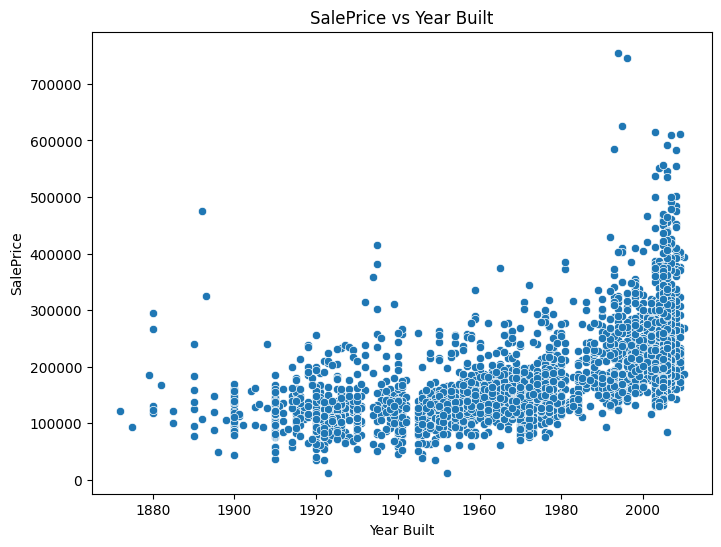

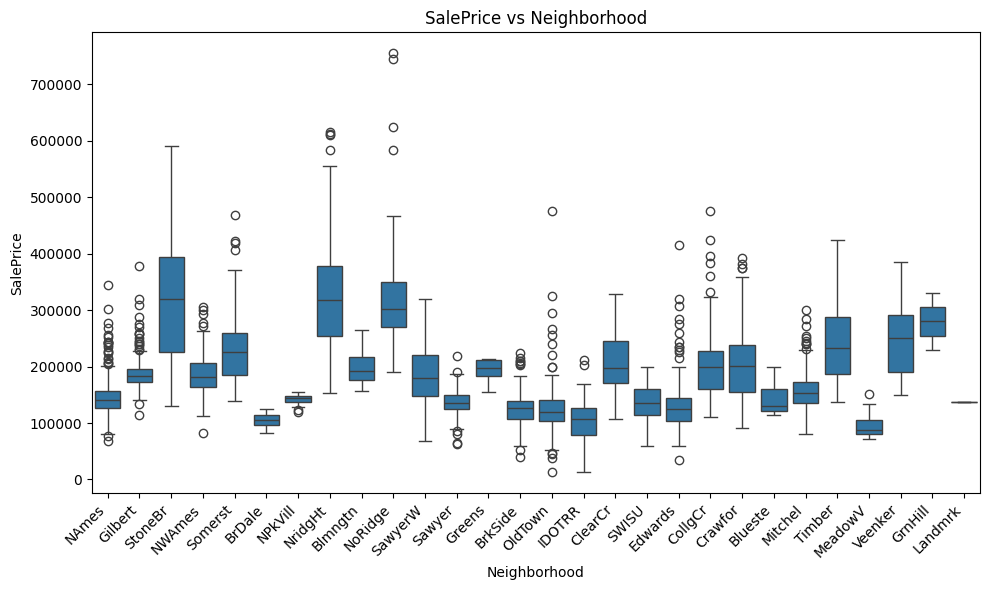

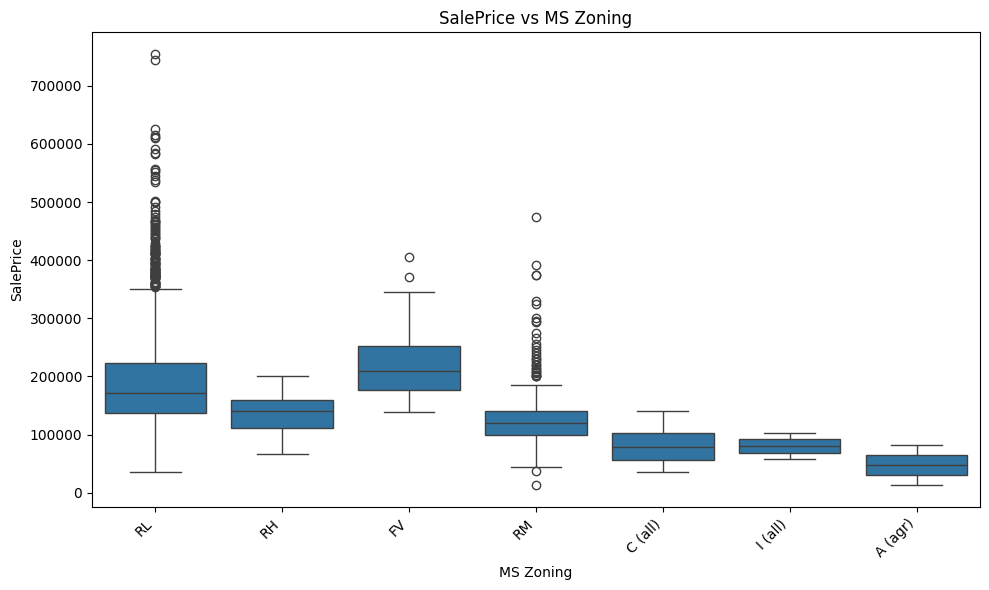

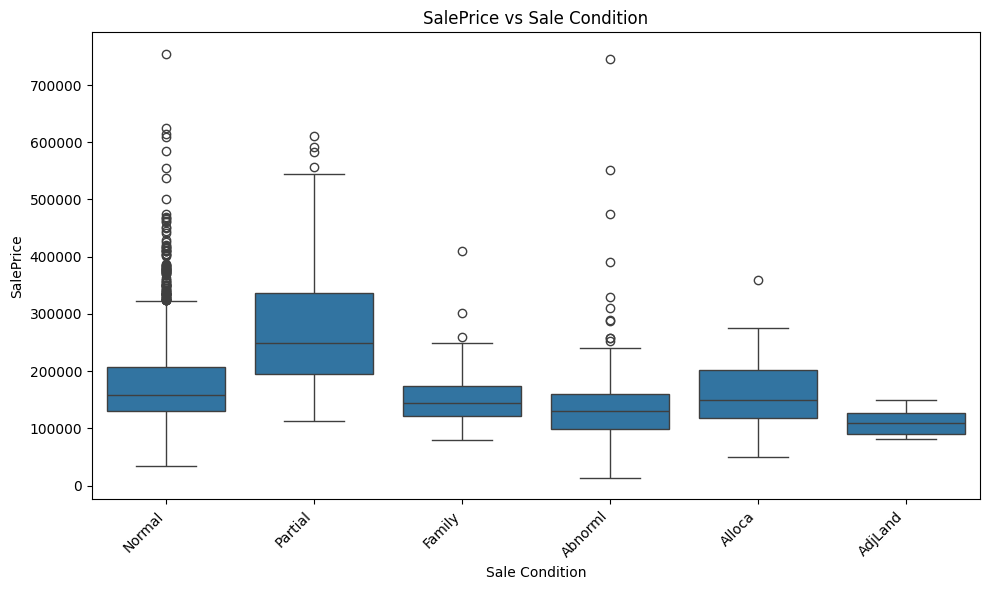

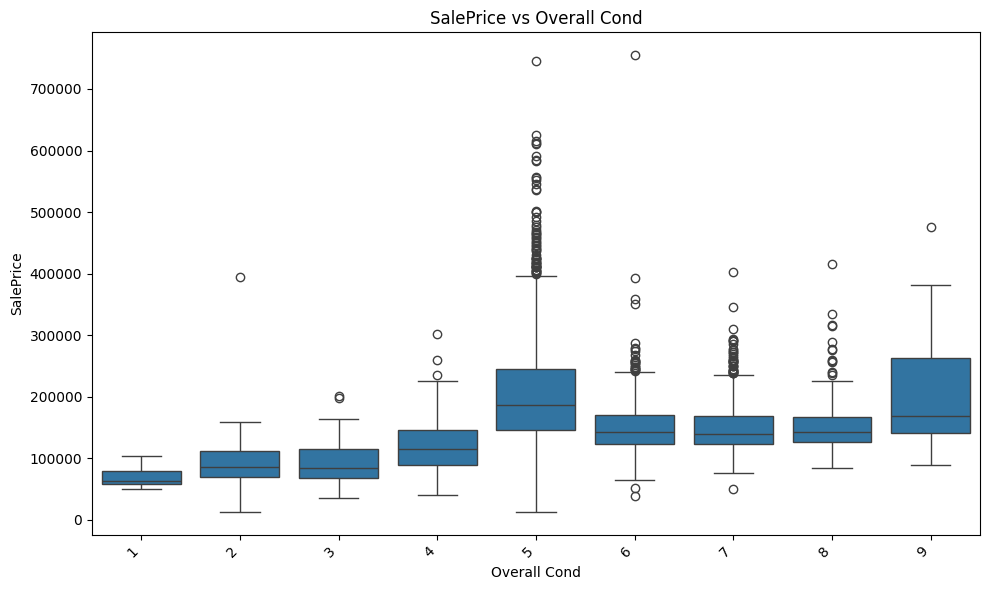

In [5]:
key_numerical_features = ['Gr Liv Area', 'Garage Area', 'Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Year Built']

for feature in key_numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_cleaned, x=feature, y='SalePrice')
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

key_categorical_features = ['Neighborhood', 'MS Zoning', 'Sale Condition', 'Overall Cond']

for feature in key_categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_cleaned, x=feature, y='SalePrice')
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [6]:
print("Analysis of Visualizations:")
print("- The heatmap of the correlation matrix showed that 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', and 'Year Built' have strong positive correlations with 'SalePrice'.")
print("- Scatter plots confirmed strong positive linear relationships between 'SalePrice' and 'Gr Liv Area', 'Garage Area', 'Overall Qual', 'Total Bsmt SF', and '1st Flr SF'. Houses with larger living areas, garage areas, higher overall quality, and larger basement/first floor areas tend to have higher sale prices.")
print("- The scatter plot of 'Year Built' against 'SalePrice' shows a general trend of newer houses having higher sale prices, although there is considerable variability.")
print("- Box plots revealed that 'Neighborhood' has a significant impact on 'SalePrice', with some neighborhoods having considerably higher median sale prices than others.")
print("- 'MS Zoning' and 'Sale Condition' also show some variation in 'SalePrice' across different categories, suggesting their influence.")
print("- 'Overall Cond' shows a less clear relationship with 'SalePrice' compared to 'Overall Qual'.")
print("\nKey variables influencing housing prices based on the visualizations include 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', and 'Neighborhood'.")

Analysis of Visualizations:
- The heatmap of the correlation matrix showed that 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', and 'Year Built' have strong positive correlations with 'SalePrice'.
- Scatter plots confirmed strong positive linear relationships between 'SalePrice' and 'Gr Liv Area', 'Garage Area', 'Overall Qual', 'Total Bsmt SF', and '1st Flr SF'. Houses with larger living areas, garage areas, higher overall quality, and larger basement/first floor areas tend to have higher sale prices.
- The scatter plot of 'Year Built' against 'SalePrice' shows a general trend of newer houses having higher sale prices, although there is considerable variability.
- Box plots revealed that 'Neighborhood' has a significant impact on 'SalePrice', with some neighborhoods having considerably higher median sale prices than others.
- 'MS Zoning' and 'Sale Condition' also show some variation in 'SalePrice' across different categories, suggesting their

## Visualização interativa




In [7]:
import plotly.express as px

fig_scatter = px.scatter(df_cleaned, x='Gr Liv Area', y='SalePrice',
                         title='SalePrice vs. Gr Liv Area',
                         hover_data=['Gr Liv Area', 'SalePrice', 'Overall Qual'])
fig_scatter.show()

fig_box = px.box(df_cleaned, x='Neighborhood', y='SalePrice',
                 title='SalePrice vs. Neighborhood')
fig_box.show()

## Modelagem Previsional




In [8]:
from sklearn.model_selection import train_test_split

features = ['Gr Liv Area', 'Garage Area', 'Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Year Built']
target = 'SalePrice'

X = df_cleaned[features]
y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (2344, 6) (2344,)
Testing set shape (X_test, y_test): (586, 6) (586,)


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"\nThe accuracy of the model (R-squared) is: {r2:.2f}")

Mean Absolute Error (MAE): 25269.24
Mean Squared Error (MSE): 1577653709.72
Root Mean Squared Error (RMSE): 39719.69
R-squared (R2): 0.80

The accuracy of the model (R-squared) is: 0.80
